<a href="https://colab.research.google.com/github/Jithendrasa/IBM-HackChallenge-2023-ADS/blob/main/ibmfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")

In [78]:
df=pd.read_csv('/content/saibaba.csv')


In [79]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [80]:
df.drop("sl_no",axis=1,inplace=True)

In [81]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [82]:
df.shape

(215, 14)

In [83]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [84]:
df.duplicated().sum()


0

In [18]:
# Handel the null value in salary we can use median to fill nan
df["salary"] = df["salary"].fillna(np.nanmedian(df["salary"]))

In [19]:
df['gender']=df['gender'].replace({'M':1,'F':0})

In [20]:
# Separate categorical and numerical data
categorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index(['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation',
       'status'],
      dtype='object')
Index(['gender', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')


In [21]:
# Check unique value in categorical data
for i in categorical_features:
    print(i,df[i].unique())
    print("="*50)

ssc_b ['Others' 'Central']
hsc_b ['Others' 'Central']
hsc_s ['Commerce' 'Science' 'Arts']
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex ['No' 'Yes']
specialisation ['Mkt&HR' 'Mkt&Fin']
status ['Placed' 'Not Placed']


In [22]:
# Check value count of categorical data
for i in categorical_features:
    print(i,df[i].value_counts())
    print("="*50)


ssc_b Central    116
Others      99
Name: ssc_b, dtype: int64
hsc_b Others     131
Central     84
Name: hsc_b, dtype: int64
hsc_s Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
degree_t Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
workex No     141
Yes     74
Name: workex, dtype: int64
specialisation Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
status Placed        148
Not Placed     67
Name: status, dtype: int64


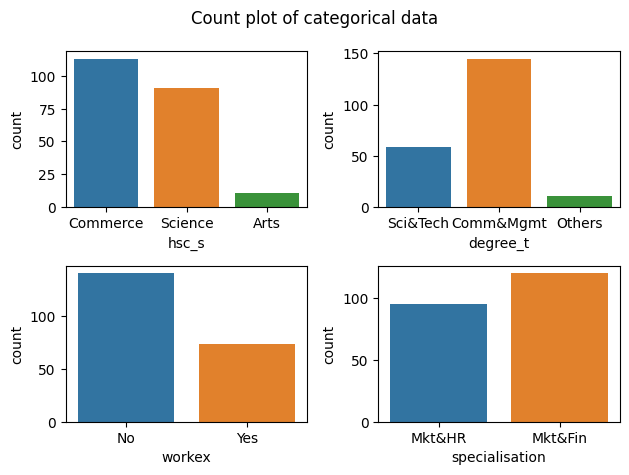

In [23]:
cati = ['hsc_s', 'degree_t', 'workex', 'specialisation']
try:
    plt.suptitle("Count plot of categorical data")
    for i in range(0,len(cati)):
        plt.subplot(2,2,i+1)
        sns.countplot(x=df[cati[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<Axes: xlabel='gender'>

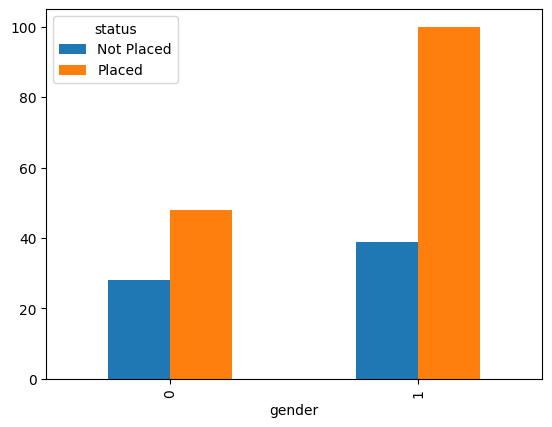

In [24]:
gender = pd.crosstab(df["gender"],df["status"])
gender.plot(kind="bar")

<Axes: xlabel='hsc_s'>

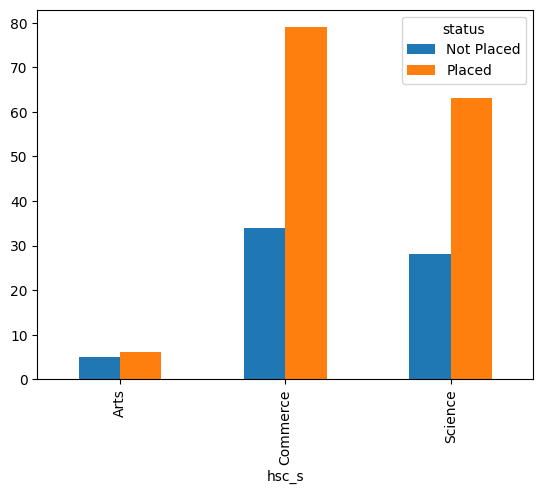

In [25]:
secondry_school = pd.crosstab(df["hsc_s"],df["status"])
secondry_school.plot(kind="bar")

<Axes: xlabel='degree_t'>

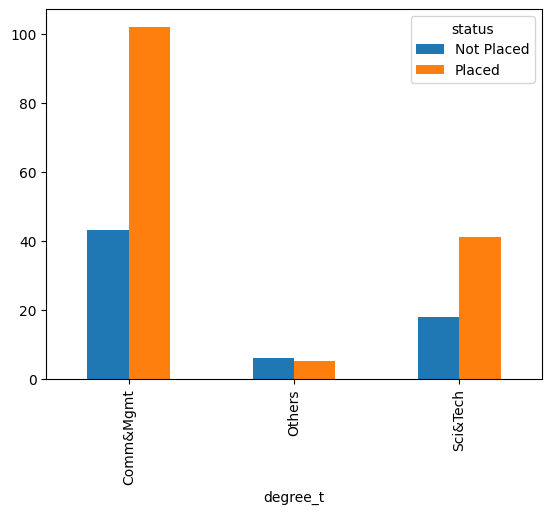

In [26]:
degree = pd.crosstab(df["degree_t"],df["status"])
degree.plot(kind="bar")

<Axes: xlabel='workex'>

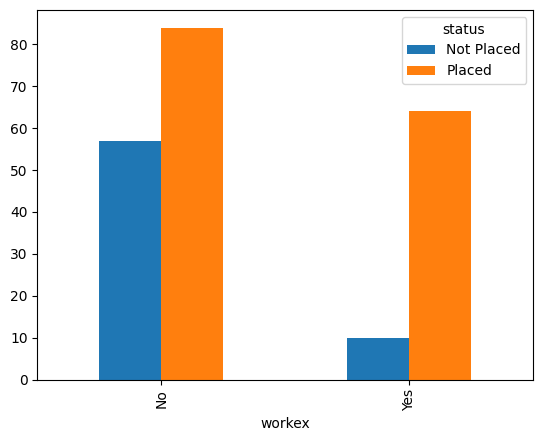

In [27]:
work_experience = pd.crosstab(df["workex"],df["status"])
work_experience.plot(kind="bar")

<Axes: xlabel='specialisation'>

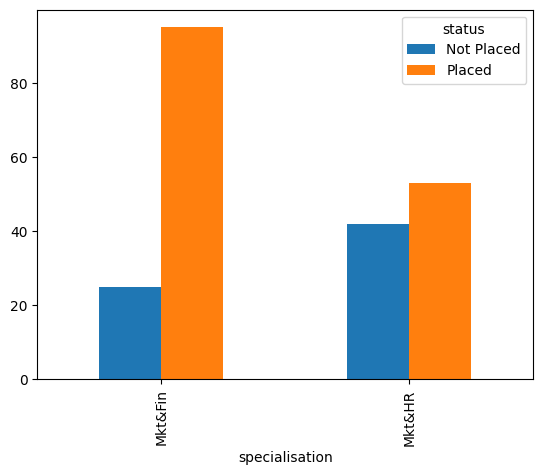

In [28]:
specialisation = pd.crosstab(df["specialisation"],df["status"])
specialisation.plot(kind="bar")

<Axes: ylabel='status'>

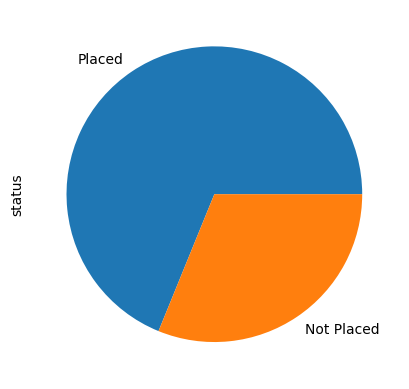

In [29]:
df["status"].value_counts().plot.pie()

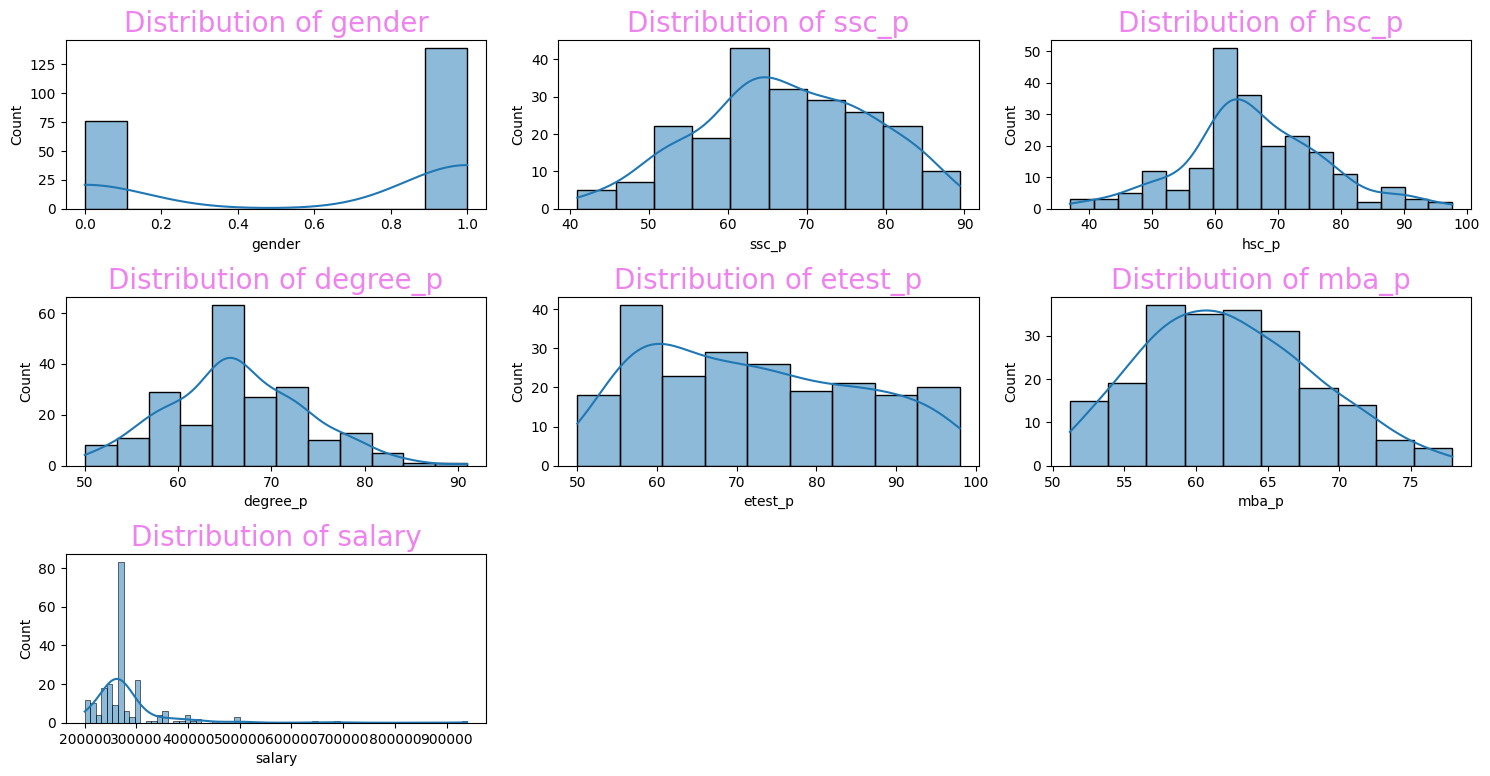

In [30]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}",fontdict= {'fontsize':20,'color':'violet'})
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

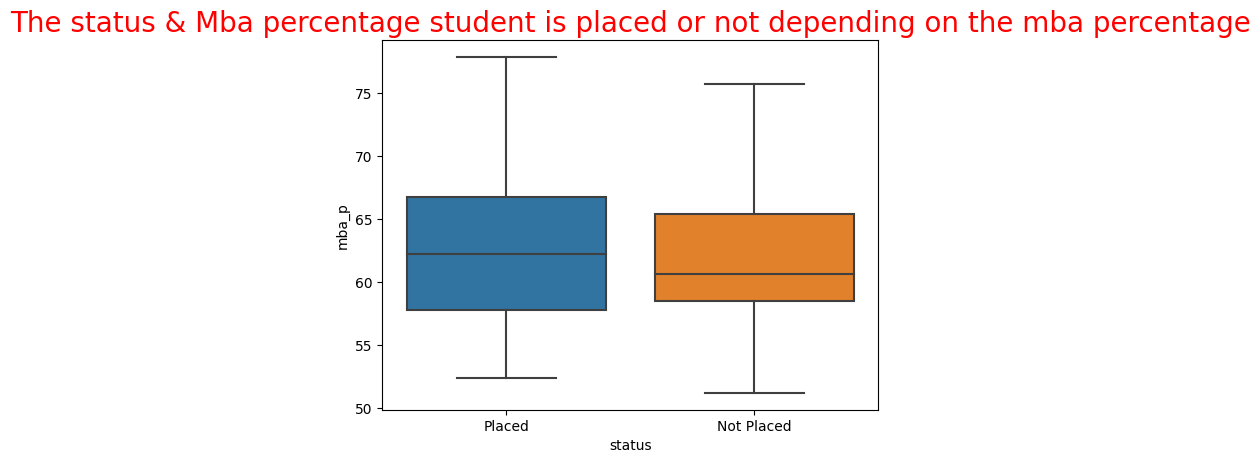

In [31]:
sns.boxplot(x=df.status,y=df.mba_p)
plt.title("The status & Mba percentage student is placed or not depending on the mba percentage",color='red',size=20)
plt.show()

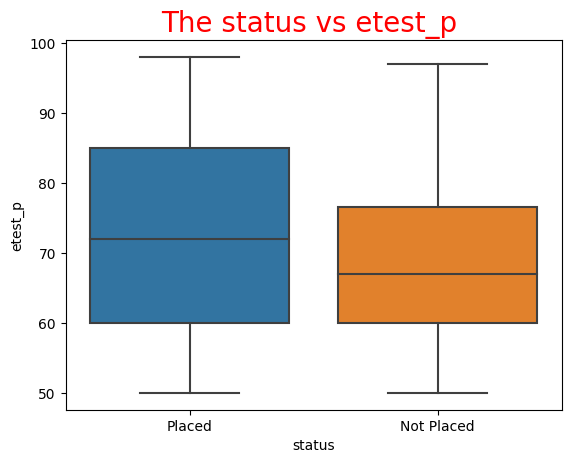

In [32]:
sns.boxplot(x=df.status,y=df.etest_p	)
plt.title("The status vs etest_p ",color='red',size=20)
plt.show()

In [33]:
# Drop Usless Columns from data
df.drop(['salary', 'gender', 'ssc_b', 'hsc_b'],axis=1,inplace=True)

In [34]:
categorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index(['hsc_s', 'degree_t', 'workex', 'specialisation', 'status'], dtype='object')
Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')


In [35]:
# now we have to do labelencoding on catiforical data
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features = ['hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

# loop through the categorical features and encode them
for i in categorical_features:
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [36]:
df

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1
211,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1
212,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1
213,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1


In [37]:
df.head()

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1


In [38]:
data_with_zeroes=np.nan_to_num(df,nan=0.0)

In [39]:
x = df.drop("status",axis=1)
y = df["status"]

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(172, 9)
(172,)
(43, 9)
(43,)


In [45]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report

In [46]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmetrix,pre,recall,f1score,accuracyscore

In [48]:
weights = {0:2,1:1}

In [49]:
# logastic regression
logastic = LogisticRegression(class_weight=weights)

In [50]:
logastic.fit(X_train,y_train)

LogisticRegression(class_weight={0: 2, 1: 1})

In [51]:
logastic.score(X_train,y_train)*100

89.53488372093024

In [52]:
y_predict = logastic.predict(X_test)

In [53]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[ 9  3]
 [ 2 29]]
PRECISION_SCORE: 0.90625
RECALL_SCORE: 0.9354838709677419
F1_SCORE: 0.9206349206349206
ACCURACY_SCORE: 0.8837209302325582


(None, None, None, None, None)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



In [ ]:
logastic.predict([[67.00,	91.00,	1,	58.00	,2,	0,	55.00,	1,	58.80	]])

array([1])

In [ ]:
logastic.predict([[49.0,	39.0,	2,	65.0,	1,	0,	63.0,	0,	51.21		]])

array([0])

In [ ]:
df

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1
211,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1
212,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1
213,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1


In [55]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assume you have your data as X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    # ... other hyperparameters you want to tune
}

# Create the HistGradientBoostingClassifier
hist_gb_clf = HistGradientBoostingClassifier()

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(hist_gb_clf, param_grid, cv=5, n_jobs=-1)

# Fit the grid search on your data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.8372093023255814
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.83      0.97      0.90        31

    accuracy                           0.84        43
   macro avg       0.85      0.73      0.76        43
weighted avg       0.84      0.84      0.82        43



In [71]:
import pickle

# Load the trained model from the file
with open('trained_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


In [72]:
import pickle

# Load the trained model from the file
with open('trained_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load your training data (replace with your actual data loading code)
X_train = x
y_train = y

# Fit the loaded model with training data
loaded_model.fit(X_train, y_train)


HistGradientBoostingClassifier()

In [74]:
# Prepare new data (replace with actual values)
new_data = [[67.00,	91.00,	1,	58.00,	2,	0,	55.0,	1,	58.80	]]

# Make predictions
new_data_predictions = loaded_model.predict(new_data)

# Use the predictions for further analysis or reporting
print("Predictions:", new_data_predictions)


Predictions: [1]


In [76]:
from sklearn.ensemble import HistGradientBoostingClassifier
import pickle

# Assume you have your training data and labels as X_train and y_train
# Instantiate the model
model = HistGradientBoostingClassifier()

# Fit the model with training data and labels
model.fit(X_train, y_train)

# Save the trained model using pickle
with open('train.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [75]:
import pickle

# Load the trained model from the file
with open('trained_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


In [73]:
df

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1
211,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1
212,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1
213,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1


In [60]:
!pip install joblib

In [ ]:
import pickle

In [ ]:
pickle.dump(logastic,open('place.pkl','wb'))